#**1. Tìm hiểu về Class Python**

In [ ]:
# Tạo một class đơn giản 1 
class Dog:
  def __init__(self, name): #hàm tạo 
    self.name = name #biến 1
  def __str__(self): #định nghĩa giá trị khi gọi trực tiêp đối tượng được tạo ra từ class 
        return self.name
  def __call__(self, a, b): 
    return a*b
  def print_name(self):
    print(self.name)
meo = Dog("mèo")
meo.print_name()
print(meo.name)
print(meo)
print(meo(10,5))

In [ ]:
# Tạo một class đơn giản 2 
class Dog:
  def __init__(self, name): #hàm tạo 
    self.name = name #biến 1
  def __str__(self): #định nghĩa giá trị khi gọi trực tiêp đối tượng được tạo ra từ class 
        return self.name
  def call(self, a, b):
    return a*b
  def print_name(self):
    print(self.name)
meo = Dog("mèo")
meo.print_name()
print(meo.name)
print(meo)
print(meo.call(10,5))

mèo
mèo
mèo
50


In [ ]:
class Cannang(Dog):
    def __init__(self,name,weight):
      super(Dog,self).__init__() #biến 1 
      self.name = name 
      self.weight = weight #biến 2 
    def __str__(self):
      return self.name + " nặng " + str(self.weight) + " cân"
    def print_name(self):
      super().print_name()
      print(self.weight, "cân")

meo = Cannang("mèo",1)
print(meo)
print()
meo.print_name()

mèo nặng 1 cân

mèo
1 cân


In [ ]:
#thừa kế class Dog
class Cannang(Dog):
    def __init__(self,name,weight):
      super().__init__(name) #biến 1 
      self.weight = weight #biến 2 
    def __str__(self):
      return self.name + " nặng " + str(self.weight) + " cân"
    def print_name(self):
      super().print_name()
      print(self.weight, "cân")

meo = Cannang("mèo",1)
print(meo)
print()
meo.print_name()

mèo nặng 1 cân

mèo
1 cân


In [ ]:
class Animal:
  def __init__(self, Animal):
    print("in ra cha 1",Animal);
 
class Mammal(Animal):
  def __init__(self, mammalName):
    print("in ra cha 2",mammalName)
    super().__init__(mammalName)
    
class NonWingedMammal(Mammal): #(1)
  def __init__(self, NonWingedMammal):
    print("in ra cha 3.1",NonWingedMammal)
    super().__init__(NonWingedMammal)

class NonMarineMammal(Mammal): #(2)
  def __init__(self, NonMarineMammal):
    print("in ra cha 3.2",NonMarineMammal)
    super().__init__(NonMarineMammal)

class Dog(NonMarineMammal, NonWingedMammal): #(1,2)
  def __init__(self):
    print('class__Dog__');
    super().__init__('Dog')
    
d = Dog()
print('')
bat = NonMarineMammal('Bat')

#**2.Tìm hiểu về tensorflow_hub**

In [ ]:
content_path = tf.keras.utils.get_file('Anh-2.jpg', 'https://i.ibb.co/rGS42y1/Anh-2.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

195196/195196 [==============================] - 0s 0us/step


## **Đọc cách 1**

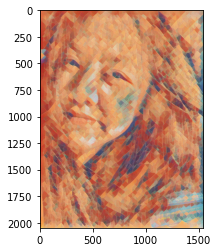

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
content_image_path = tf.keras.utils.get_file('Anh-2.jpg', 'https://i.ibb.co/rGS42y1/Anh-2.jpg')
style_image_path = tf.keras.utils.get_file('background-vintage-14.jpg','https://i.ibb.co/7kFyzWn/background-vintage-14.jpg')
# style_image_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)
# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# Load image stylization module.
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

img_new = tf.cast(stylized_image[0]*255, tf.int32)
plt.imshow(img_new)
plt.show()

## **Đọc cách 2**

In [ ]:
content_path = tf.keras.utils.get_file('Anh-2.jpg', 'https://i.ibb.co/rGS42y1/Anh-2.jpg')
style_path = tf.keras.utils.get_file('background-vintage-14.jpg','https://i.ibb.co/7kFyzWn/background-vintage-14.jpg')

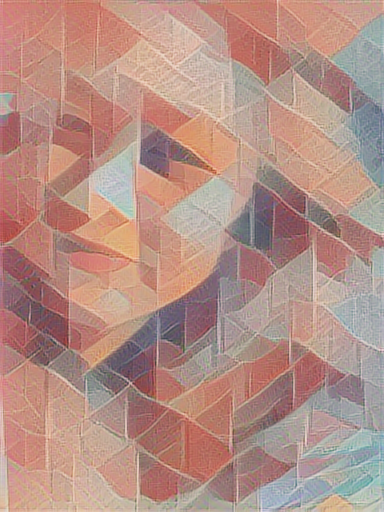

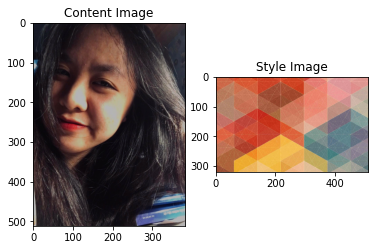

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img) # kết nối với link path_to_img
  img = tf.image.decode_image(img, channels=3) # đọc ảnh với chiều = 3
  img = tf.image.convert_image_dtype(img, tf.float32) # chuyển int sang float <=1

  shape = tf.cast(tf.shape(img)[:-1], tf.float32) # tf.shape(img)[:-1]==img.shape[:-1] - lấy cỡ 2 chiều đầu của img
  long_dim = max(shape) #lấy chiều có cỡ lớn nhất 
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32) #tạo ra chiều mới với mặc định chiều lớn = 512

  img = tf.image.resize(img, new_shape) #tạo ảnh mới đã được giảm chiều 
  img = img[tf.newaxis, :] #cho img vào trong chiều để tăng chiều dữ liệu
  return img
def imshow(image, title=None): #title:tiêu đề
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0) #giảm về 3 chiều để show

  plt.imshow(image)
  if title:
    plt.title(title)
def tensor_to_image(tensor): #đọc sản phẩm đầu ra của model
  import PIL.Image
  tensor = tensor*255 
  tensor = np.array(tensor, dtype=np.uint8) # chuyển ảnh sang kiểu int <=255
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

# hiển thị ảnh lúc đọc
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image)) # trả về 1 list trong list có 1 phần tử 
stylized_image = stylized_image[0] # kiểu dữ liệu là tensorflow.python.framework.ops.EagerTensor
                                   # số chiều là 4
tensor_to_image(stylized_image)

## **Bài toán khác**

In [ ]:
import os
from pprint import pprint
from six import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image, ImageColor, ImageDraw, ImageFont, ImageOps
from tqdm import tqdm
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1") 
# The input tensor is a tf.uint8 tensor with shape [1, height, width, 3] with values in [0, 255].

def load_img_new(path_to_img):
  img = tf.io.read_file(path_to_img) # kết nối với link path_to_img
  img = tf.image.decode_image(img, channels=3) # đọc ảnh với chiều = 3
  img = img[tf.newaxis, :] #cho img vào trong  chiều để tăng chiều dữ liệu
  # new_img = tf.cast(img, tf.uint8)
  return img # new_img
content_path = tf.keras.utils.get_file('Anh-2.jpg', 'https://i.ibb.co/rGS42y1/Anh-2.jpg')

image_tensor  = load_img_new(content_path)
detector_output = detector(image_tensor)
class_ids = detector_output["detection_classes"]

In [ ]:
detector_output.keys()

dict_keys(['detection_boxes', 'raw_detection_boxes', 'detection_classes', 'detection_anchor_indices', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_scores'])

- num_detections: a tf.int tensor with only one value, the number of detections [N].
- detection_boxes: a tf.float32 tensor of shape [N, 4] containing bounding box coordinates in the following order: [ymin, xmin, ymax, xmax].
- detection_classes: a tf.int tensor of shape [N] containing detection class index from the label file.
- detection_scores: a tf.float32 tensor of shape [N] containing detection scores.
- raw_detection_boxes: a tf.float32 tensor of shape [1, M, 4] containing decoded detection boxes without Non-Max suppression. M is the number of raw detections.
- raw_detection_scores: a tf.float32 tensor of shape [1, M, 90] and contains class score logits for raw detection boxes. M is the number of raw detections.
detection_anchor_indices: a tf.float32 tensor of shape [N] and contains the anchor indices of the detections after NMS.
- detection_multiclass_scores: a tf.float32 tensor of shape [1, N, 90] and contains class score distribution (including background) for detection boxes in the image including background class. 

#**3.Tìm hiểu về tensorflow trong bài**

In [ ]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [ ]:
content_path = tf.keras.utils.get_file('Anh-2.jpg', 'https://i.ibb.co/rGS42y1/Anh-2.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img) # kết nối với link path_to_img
  img = tf.image.decode_image(img, channels=3) # đọc ảnh với chiều = 3
  img = tf.image.convert_image_dtype(img, tf.float32) # chuyển int sang float <=1

  shape = tf.cast(tf.shape(img)[:-1], tf.float32) # tf.shape(img)[:-1]==img.shape[:-1] - lấy cỡ 2 chiều đầu của img
  long_dim = max(shape) #lấy chiều có cỡ lớn nhất 
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32) #tạo ra chiều mới với mặc định chiều lớn = 512

  img = tf.image.resize(img, new_shape) #tạo ảnh mới đã được giảm chiều 
  img = img[tf.newaxis, :] #cho img vào trong chiều để tăng chiều dữ liệu
  return img

195196/195196 [==============================] - 0s 0us/step


**Sử dụng các lớp trung gian của mô hình để có được các biểu diễn nội dung và phong cách của hình ảnh. Bắt đầu từ lớp đầu vào của mạng, một số kích hoạt lớp đầu tiên biểu thị các tính năng cấp thấp như các cạnh và kết cấu. Khi bạn bước qua mạng, một vài lớp cuối cùng biểu thị các tính năng cấp cao hơn—các bộ phận của đối tượng như bánh xe hoặc mắt. Trong trường hợp này, bạn đang sử dụng kiến trúc mạng VGG19, một mạng phân loại hình ảnh được đào tạo trước. Các lớp trung gian này là cần thiết để xác định cách thể hiện nội dung và phong cách từ các hình ảnh. Đối với một hình ảnh đầu vào, hãy cố gắng khớp các biểu diễn mục tiêu nội dung và phong cách tương ứng tại các lớp trung gian này.**

In [ ]:
content_image = load_img(content_path)
print(content_image.shape)
style_image = load_img(style_path)
print(style_image.shape)

(1, 512, 384, 3)
(1, 336, 512, 3)


In [ ]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255) 
x = tf.image.resize(x, (224, 224)) 
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet') #1 
prediction_probabilities = vgg(x) #2 
prediction_probabilities.shape

574710816/574710816 [==============================] - 37s 0us/step


TensorShape([1, 1000])

In [ ]:
vgg.summary()

## Các hàm cơ bản trong code mẫu


1.   **tf.keras.applications.vgg19.preprocess_input** 
- đầu vào là input đã đc chuyển về dạng <=255, nhận ảnh dạng mảng tensor hoặc 
mảng numpy 
- sử dụng để tiền xử lý dữ liệu, ở đây là **chuyển đổi hình ảnh đầu vào từ RGB sang BGR**
2.   **tf.image.resize** 
- resize của ảnh : chuyển mảng tensor từ (1,?,?,3) thành (1, 224, 224, 3) để phù hợp đầu vào của VGG19 
3.   **tf.keras.applications.VGG19**
- input_shape để mặc định (224, 224, 3)
- weights='imagenet' cho phép mô hình được tạo ra sẽ được huấn luyện trước dưới tập dữ **Imagenet**
- include_top= True là có 3 lớp fully-connected layer ở đầu mô hình vgg19 
(fully connected layer là  mỗi node trong hidden layer được kết nối với tất cả các node trong layer trước) **- có đầu phân loại** 



In [ ]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

35363/35363 [==============================] - 0s 0us/step


[('seat_belt', 0.15828596),
 ('wig', 0.09755264),
 ('fur_coat', 0.064533144),
 ('hair_spray', 0.06029126),
 ('lipstick', 0.046843532)]



1.   **tf.keras.applications.vgg19.decode_predictions** 
- trả về đánh giá của mô hình khi học với dữ liệu **Imagenet**
- trả về một mảng 1 phần tử, bên trong gồm các **tuple(tên lớp, mô tả, và điểm)**  


In [ ]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name,end= ", ")

80134624/80134624 [==============================] - 5s 0us/step

input_2, block1_conv1, block1_conv2, block1_pool, block2_conv1, block2_conv2, block2_pool, block3_conv1, block3_conv2, block3_conv3, block3_conv4, block3_pool, block4_conv1, block4_conv2, block4_conv3, block4_conv4, block4_pool, block5_conv1, block5_conv2, block5_conv3, block5_conv4, block5_pool, 

1.  **tf.keras.applications.VGG19(include_top=False)** thì input_shape = (None, None, None, 3)

In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
content_layers = ['block5_conv2'] # (None, None, None, 512)

style_layers = ['block1_conv1', # (None, None, None, 64)
                'block2_conv1', # (None, None, None, 128)
                'block3_conv1', # (None, None, None, 256)
                'block4_conv1', # (None, None, None, 512)
                'block5_conv1'] # (None, None, None, 512)

num_content_layers = len(content_layers) # lấy 1 layer dùng cho ảnh content 
num_style_layers = len(style_layers)  # lấy 5 layer dùng cho ảnh style

In [ ]:
content_layers + style_layers

['block5_conv2',
 'block1_conv1',
 'block2_conv1',
 'block3_conv1',
 'block4_conv1',
 'block5_conv1']

In [ ]:
def vgg_layers(layer_names):
  """ Creates a VGG model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on ImageNet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False #mô hình sẽ không cần training đến mức bão hòa, giảm loss và tăng score 
  
  outputs = [vgg.get_layer(name).output for name in layer_names] # lấy các layer được chọn ra 

  model = tf.keras.Model([vgg.input], outputs) # trả về model gồm đầu vào là (1, vgg.input.shape) và đầu ra là layer đc lấy ra 
  return model

In [ ]:
style_extractor = vgg_layers(style_layers) 
style_outputs = style_extractor(style_image*255) 

In [ ]:
style_extractor = vgg_layers(style_layers) # tạo ra model vgg19
style_outputs = style_extractor(style_image*255) 
# trả về đầu ra của style_image( có 5 đầu ra tương ứng 5 layer trong style_layers) 

# một số thống kê về 5 đầu ra 
for name, output in zip(style_layers, style_outputs): # name in style_layers, output in style_outputs
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 336, 512, 64)
  min:  0.0
  max:  835.5256
  mean:  33.97525

block2_conv1
  shape:  (1, 168, 256, 128)
  min:  0.0
  max:  4625.8857
  mean:  199.82687

block3_conv1
  shape:  (1, 84, 128, 256)
  min:  0.0
  max:  8789.239
  mean:  230.78099

block4_conv1
  shape:  (1, 42, 64, 512)
  min:  0.0
  max:  21566.135
  mean:  791.24005

block5_conv1
  shape:  (1, 21, 32, 512)
  min:  0.0
  max:  3189.2542
  mean:  59.179478



In [ ]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0) 
#đề phòng khi các phần tử trong ảnh nằm ngoài khoảng (0,1)

# **4. Gradient Descent**

## 4.1 Khái niệm cơ bản

Gradient Descent là một thuật toán tối ưu hóa, thường được sử dụng để tìm giá trị tối thiểu của một hàm số. Trong Machine Learning, Gradient Descent được sử dụng để cập nhật các tham số của mô hình sao cho chúng có thể dự đoán đầu ra tốt nhất cho tập dữ liệu đầu vào. Cụ thể, trong quá trình huấn luyện một mô hình học máy, Gradient Descent được sử dụng để tính toán gradient của hàm mất mát (loss function) đối với các tham số của mô hình, sau đó dùng gradient này để cập nhật các tham số sao cho hàm mất mát giảm dần theo thời gian. 

Cách hoạt động của Gradient Descent là tìm đường dốc của hàm số tại một điểm cụ thể, sau đó di chuyển đến hướng ngược lại đường dốc đó, với một khoảng cách được quyết định trước. Cứ tiếp tục lặp lại quá trình này cho đến khi đạt được giá trị nhỏ nhất hoặc đủ gần với giá trị nhỏ nhất của hàm mất mát.

Các tham số của mô hình, chẳng hạn như các hệ số trong hồi quy tuyến tính và các trọng số trong mạng nơ-ron, được cập nhật bằng cách lấy giá trị hiện tại của các tham số trừ cho tích gradient của hàm mất mát đối theo các tham số đó với một hệ số học tập (learning rate) . Việc lựa chọn hệ số học tập quan trọng để giúp thuật toán hội tụ nhanh hơn và đạt được kết quả tối ưu tốt hơn.

## 4.2 Các hàm chi phí phổ biến 

a. Mean Squared Error, MSE

b. Sum Squared Error, SSE

c. Root Mean Squared Error, RMSE {căn của trung bình giữa (hiệu y và y_hat đã được bình phương) }

c. Cross-Entropy
- Công thức: $CrossEntropy = \frac{-1}{n} * sum(y * log(y_{hat}) + (1 - y) * log(1 - y_{hat}))$

d. Hàm Hinge Loss
- Công thức: $Hinge Loss = \frac{1}{n} * sum(max(0, 1 - y * y_{hat}))$


## 4.3 Công thức 

Để tính toán giảm dần độ dốc, chúng ta cần tính toán độ dốc của hàm chi phí liên quan đến từng tham số mô hình $W_i$.

Hàm loss được dùng là SSE

Gradient :
\begin{equation*}
W^{next_{step}} = W^{now} - learningRate* \nabla_{W} SSE(\theta)
\end{equation*}


## 4.4 Ví dụ trong hồi quy

In [ ]:
a = np.random.rand(1)[0]
b = np.random.rand(1)[0]
(a,b)

In [ ]:
h = 1e-10
def lossSSE(x,y,a,b):
  def f(x,a,b):
    return a*x + b
  return np.sum(np.square(f(x,a,b)-y))

In [ ]:
learning_rate = 1e-3
for i in range(4000):
  delta_a = (lossSSE(x,y,a+h,b) -lossSSE(x,y,a-h,b)) /(2*h) #x là input, y là output
  delta_b = (lossSSE(x,y,a,b+h) -lossSSE(x,y,a,b-h)) /(2*h)
  a = a - delta_a*learning_rate
  b = b - delta_b*learning_rate

## 4.5 Gradient Descent trong mạng nơ-ron
Trong mạng nơ-ron, Gradient Descent được sử dụng để cập nhật trọng số giữa các lớp nơ-ron để giảm thiểu sai số của mô hình trên tập dữ liệu huấn luyện.

Trong Gradient Descent, các trọng số được cập nhật bằng cách tính đạo hàm của hàm chi phí theo từng trọng số, sau đó cập nhật các trọng số theo hướng ngược với đạo hàm. Điều này có nghĩa là các trọng số sẽ được cập nhật bằng cách di chuyển đối với giá trị trọng số giảm đạo hàm nhất của hàm chi phí. Quá trình này được lặp lại cho đến khi đạt được một điều kiện dừng nhất định, chẳng hạn như số lần lặp lại hoặc sự hội tụ của hàm chi phí.

Gradient Descent là một trong những thuật toán quan trọng nhất trong việc huấn luyện mạng nơ-ron và đã được sử dụng rộng rãi trong các mô hình Deep Learning.

## 4.6 tf.GradientTape

In [ ]:
# thư viện
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Tải tập dữ liệu nhà ở California
housing = fetch_california_housing(as_frame = True)
x = housing.data
y = housing.target.values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
x = scaler.fit_transform(x)
x.shape

(20640, 8)

In [ ]:
tf.random.set_seed(0)
w = tf.Variable(initial_value=tf.random.normal((8, 1)), dtype=tf.float32)
b = tf.Variable(initial_value=tf.zeros((1, 1)), dtype=tf.float32)
(x.shape,w.shape)

((20640, 8), TensorShape([8, 1]))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
# Định nghĩa hàm dự đoán
def f(x, w, b):
    return x @ w + b 

# Định nghĩa hàm tính lỗi bình phương trung bình
def mean_squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Sử dụng tf.GradientTape để ghi lại quá trình chuyển tiếp
def train_step(x, y, w, b):
    with tf.GradientTape() as tape:
        y_pred = f(x, w, b)
        loss = mean_squared_error(y_pred, y)
    
    # Tính đạo hàm của loss với w ,b 
    grad = tape.gradient(loss, [w, b])
    
    # Cập nhật tham số mô hình
    opt.apply_gradients(zip(grad, [w, b]))

    return loss

# Huấn luyện mô hình
num_epochs = 10
for epoch in range(num_epochs):
    loss = train_step(x, y, w, b)
    print(f"Epoch {epoch + 1}: loss = {loss.numpy().mean()}")

# In ra tham số mô hình cuối cùng
print(f"w = {w.numpy().squeeze()}, b = {b.numpy().squeeze()}")

# Đánh giá mô hình
y_pred = f(x, w, b) 
print(f"Mean Squared Error: {mean_squared_error(y_pred, y).numpy().mean()}")

Epoch 1: loss = 8.159704208374023
Epoch 2: loss = 8.039326667785645
Epoch 3: loss = 7.896164894104004
Epoch 4: loss = 7.740942001342773
Epoch 5: loss = 7.5784807205200195
Epoch 6: loss = 7.411567211151123
Epoch 7: loss = 7.242035865783691
Epoch 8: loss = 7.0711846351623535
Epoch 9: loss = 6.899987697601318
Epoch 10: loss = 6.729199409484863
w = [ 1.341786    0.27590266 -0.2079206  -0.78993773 -1.0072699   0.32720986
  0.20177445  0.96838826], b = 0.288181334733963
Mean Squared Error: 6.559420585632324


# 5.Mô tả thuật toán Adam

In [ ]:
#Tạo một trình tối ưu hóa. Bài báo đề xuất LBFGS, nhưng Adam cũng hoạt động tốt:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
#Trình tối ưu hóa sử dụng thuật toán Adam 
#Tối ưu hóa Adam là một phương pháp giảm dần độ dốc ngẫu nhiên dựa trên ước tính thích ứng của các khoảnh khắc bậc nhất và bậc hai.

## 5.1 Khái niệm
**Adam**

Adam là một thuật toán tối ưu hóa gradient descent được sử dụng rộng rãi trong các mô hình học sâu. Nó kết hợp các ưu điểm của hai thuật toán tối ưu hóa là Momentum và AdaGrad.

Momentum giúp giảm tốc độ gradient descent và đảm bảo việc hội tụ tốt hơn bằng cách cập nhật trọng số dựa trên độ lớn của gradient trước đó. AdaGrad giúp cập nhật tốc độ học cho từng trọng số tùy theo tần suất xuất hiện của gradient.

Adam tính toán giá trị động lượng (momentum) của gradient và độ lớn của gradient, và kết hợp chúng để cập nhật các trọng số. Trong quá trình tối ưu, các trọng số được cập nhật với một tốc độ học thích ứng, giúp cải thiện khả năng hội tụ của thuật toán.

Cụ thể, trong mỗi vòng lặp, Adam tính toán các giá trị độ lớn gradient (v) và động lượng (m) bằng cách tính trung bình động của gradient và gradient bình phương trong quá khứ. Sau đó, nó cập nhật tốc độ học cho từng trọng số tùy theo tần suất xuất hiện của gradient. Cuối cùng, các trọng số được cập nhật bằng cách sử dụng động lượng và tốc độ học được tính toán trước đó.

Tóm lại, Adam kết hợp động lượng và tốc độ học để cập nhật trọng số, giúp thuật toán tối ưu hóa gradient descent hội tụ nhanh hơn và tránh được các local minimum nhiễu. 

## 5.2 Công thức 
Công thức của thuật toán Adam như sau:

-  Với mỗi trọng số w, tính toán gradient của hàm mất mát theo w: g. 
- Tính toán động lượng (momentum) của gradient: $m = beta_1 * m + (1 - beta_1) * g.$
- Tính toán độ lớn của gradient (RMSProp): $v = beta_2 * v + (1 - beta_2) * g^2.$
- Điều chỉnh động lượng và độ lớn của gradient: $m_{hat} = \frac{m}{1 - beta_1^t}, v_{hat} = \frac{v}{1 - beta_2^t}$, với t là số vòng lặp hiện tại.
- Cập nhật trọng số: $w = w - \frac{alpha * m_{hat}}{sqrt(v_{hat}) + epsilon}$, với alpha là tốc độ học (learning rate) và epsilon là một giá trị rất nhỏ được sử dụng để tránh chia cho số không.

## 5.3 Code

In [ ]:
import numpy as np

def adam(X, y, learning_rate=0.01, b1=0.9, b2=0.999, epsilon=10**-8, num_iterations=1000):
    n_features = X.shape[1]
    n_samples = X.shape[0]
    w = np.zeros((n_features, 1))
    m1 = np.zeros((n_features, 1))
    m2 = np.zeros((n_features, 1))
    for i in range(num_iterations):
        y_hat = np.dot(X, w)
        loss = np.mean((y - y_hat)**2)
        gradient = -2 * np.dot(X.T, (y - y_hat)) / n_samples
        m1 = b1 * m1 + (1 - b1) * gradient
        m2 = b2 * m2 + (1 - b2) * gradient**2
        m1_hat = m1 / (1 - b1**(i+1))
        m2_hat = m2 / (1 - b2**(i+1))
        w = w - learning_rate * m1_hat / (np.sqrt(m2_hat) + epsilon)
    return w

## 5.4 Thuật toán L-BFGS

### 5.4.1 Khái niệm 
Thuật toán tối ưu L-BFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) là một thuật toán tối ưu được sử dụng rộng rãi trong học máy để tối ưu hàm mất mát và các hàm khác. Nó được phát triển bởi Jorge Nocedal, Dong C. Liu vào năm 1980 dựa trên phương pháp BFGS và được cải tiến bởi Nocedal và diễn giải trong báo cáo 1994 của ông.

Thuật toán L-BFGS thuộc loại thuật toán tối ưu không sử dụng gradient cơ bản, mà là thuật toán tối ưu dựa trên gradient. Thuật toán này được xếp vào loại thuật toán tối ưu dựa trên gradient thứ hai, có nghĩa là nó sử dụng các giá trị gradient thứ hai của hàm mất mát để cải thiện tốc độ hội tụ của nó.

Thuật toán L-BFGS giống như các thuật toán tối ưu gradient descent khác, tuy nhiên nó sử dụng một bộ nhớ hạn chế để lưu trữ các giá trị của gradient và giá trị của hàm mất mát tại các điểm đã xét trước đó. Việc lưu trữ giới hạn giúp tiết kiệm bộ nhớ và giúp thuật toán tối ưu các hàm mất mát với số chiều lớn hơn.

Công thức của thuật toán L-BFGS được tính dựa trên các giá trị gradient của hàm mất mát và các giá trị của hàm mất mát ở các vị trí đã xét trước đó, vì vậy thuật toán này là một phương pháp được gọi là "đánh giá gradient lần đầu" (quasi-Newton method).

Một số ưu điểm của thuật toán L-BFGS là:

- Không yêu cầu lưu trữ ma trận Hessian cỡ lớn, do đó tiết kiệm bộ nhớ và tính toán nhanh hơn so với các phương pháp Newton hoặc quasi-Newton khác.
Được chứng minh là hội tụ nhanh và ổn định trên các hàm mất mát liên tục và lồi.

Tuy nhiên, L-BFGS cũng có một số hạn chế, chẳng hạn như:

- Tính ổn định của thuật toán có thể bị ảnh hưởng bởi kích thước bộ nhớ được sử dụng để lưu trữ thông tin gradient thứ hai.
-Thuật toán không cho phần kết hợp với các ràng buộc ràng buộc phi tuyến, ví dụ như các ràng buộc bất bậc và ràng buộc nguyên.

Ngoài ra, vì thuật toán sử dụng một phương pháp đánh giá ước tính gradient thứ hai thay vì tính toán trực tiếp gradient thứ hai, nên có thể không đảm bảo rằng thuật toán sẽ tìm được giá trị tối ưu chính xác cho các bài toán có bậc thang cao hoặc địa phương rõ ràng. Tuy nhiên, những hạn chế này có thể được khắc phục bằng cách sử dụng các biến thể của thuật toán L-BFGS hoặc các thuật toán tối ưu khác phù hợp hơn cho từng bài toán cụ thể.


### 5.4.2 Code 

In [ ]:
from scipy.optimize import minimize
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Define the initial guess
x0 = np.array([0, 0])

# Define the bounds for the variables
bounds = ((-5, 5), (-5, 5))

# Use L-BFGS-B to minimize the function
result = minimize(rosenbrock, x0, method='L-BFGS-B', bounds=bounds)

# Print the results
print(result)

#**6.Lan truyền ngược** (Backward - Backpropagation) 

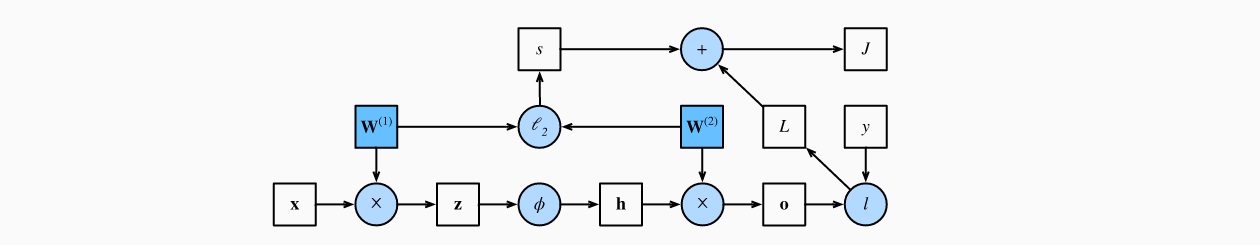

   

---
                                                    Đồ thị lan truyền thuận - forward
---



$W^{(1)}$ và $W^{(2)}$ ở đồ thị lan truyền thuận là các tham số mạng nơron đơn giản với một lớp ẩn. Mục tiêu của backpropagation là tính toán các **gradient** $\frac{∂J}{∂W^{(1)}}$ và $\frac{∂J}{∂W^{(2)}}$. Để thực hiện điều này, chúng tôi áp dụng quy tắc dây chuyền và lần lượt tính toán độ dốc của từng biến và tham số trung gian. Thứ tự của các phép tính được đảo ngược so với thứ tự được thực hiện trong quá trình lan truyền thuận, vì chúng ta cần bắt đầu với kết quả của đồ thị tính toán và tiến tới các tham số.

## 6.1 Khái niệm cơ bản 

Lan truyền ngược đề cập đến phương pháp tính toán độ dốc của các tham số mạng thần kinh. Đó là thực hiện tinh chỉnh các trọng số của mạng nơ-ron dựa trên tỷ lệ lỗi (tức là mất mát) thu được trong lần chạy trước (epoch). Việc điều chỉnh các trọng số đúng cách đảm bảo tỷ lệ lỗi thấp hơn, làm cho mô hình trở nên đáng tin cậy bằng cách tăng sự khái quát.

Nói tóm lại, phương pháp này đi qua mạng theo thứ tự ngược lại, từ lớp đầu ra đến lớp đầu vào( forward từ lớp đầu vào đến lớp đầu ra), theo quy tắc dây chuyền từ phép tính. Thuật toán lưu trữ bất kỳ biến trung gian nào (đạo hàm riêng) được yêu cầu trong khi tính toán độ dốc đối với một số tham số. Giả sử rằng chúng ta có các chức năng Y = *f*(X) và  Z = *g*(X), trong đó đầu vào và đầu ra X, Y, Z là các tensor có hình dạng tùy ý. Bằng cách sử dụng quy tắc dây chuyền, chúng ta có thể tính đạo hàm của Z đối với X thông qua công thức:

$\frac{∂Z}{∂X}$ = prod($\frac{∂Z}{∂Y}$,$\frac{∂Y}{∂X}$).

**prod** là toán tử để nhân các đối số của nó sau khi thực hiện các thao tác cần thiết, chẳng hạn như chuyển vị và hoán đổi vị trí đầu vào. Đối với vectơ, điều này rất đơn giản: nó chỉ đơn giản là phép nhân ma trận-ma trận. Đối với các tensors chiều cao hơn, họ sử dụng cách tính toán thích hợp khác.

## 6.2 Mục tiêu của backpropagation 

Điều chỉnh từng weight mạng theo tỷ lệ với mức độ đóng góp lỗi của chúng. Nếu chúng ta lặp đi lặp lại giảm từng lỗi và update weight, cuối cùng chúng ta sẽ có một loạt các weight tạo ra mạng có thể dự đoán tốt

## 6.3 Cách tính 

- $W^{(new)}$ = $W^{(now)}$ - ($∇_W$Loss_fuc*learning_rate)

- Loss_fuc = L(R(Z(XM)))


- Hàm loss fuction là các hàm nồng nhau và sử dụng hàm SE(squared error) (*1/2 để dễ đạo hàm)
- Sử dụng hàm kích hoạt (activation functions) là ReLu
- $W^{(input)}$ = Z(W,X) = X*W (X là đầu vào, W là các trọng số, ngoài ra nếu có bias thì + bias)
>                                     Công thức
  - Weighted input: Z  = XW   
\begin{equation*} Z'(X) = W\\Z'(W) = X \end{equation*}
  - ReLu activation: R = max(0, Z) 
\begin{matrix} R'(Z) = 0  & if & Z<0 \\R'(Z) = 1  & if & Z>0  \end{matrix}
  - Loss function: L = $\frac{1}{2}(ŷ - y)^2 $
\begin{equation*} L'(ŷ) = (ŷ - y)  \end{equation*}

=> **$∇_W$Loss_fuc = $∇_R$L * $∇_Z$R * $∇_W$Z = (ŷ - y) * $∇_Z$R * X** 

### a. Mạng 1 lớp ẩn 

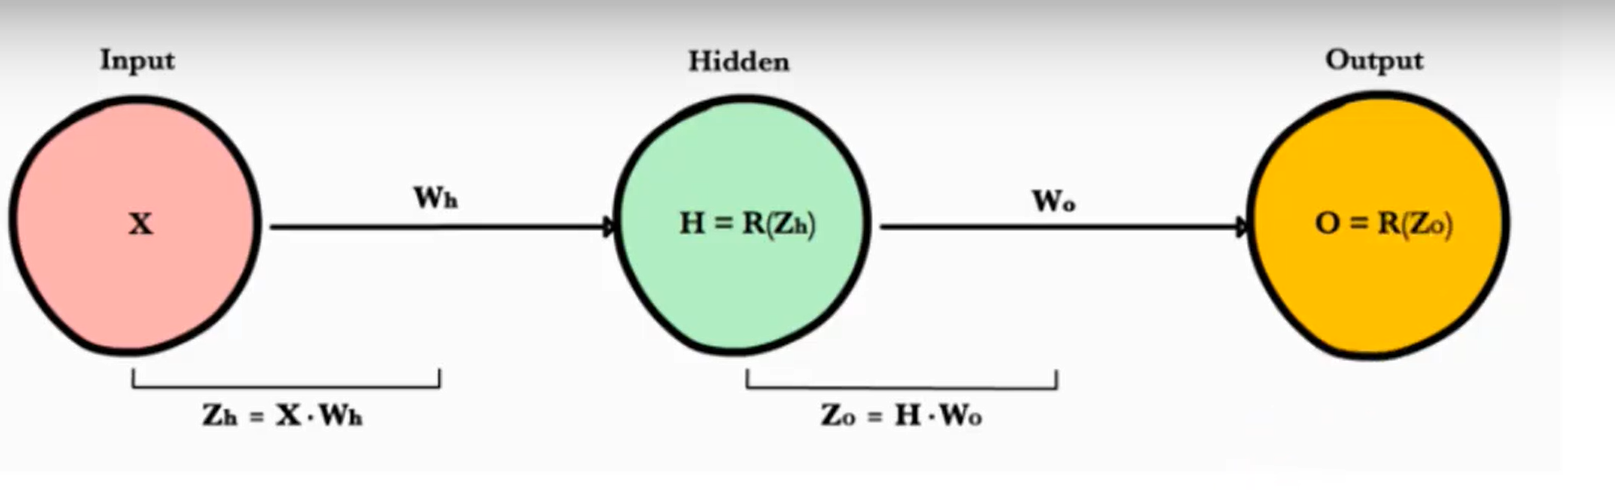

**$∇_{W_o}$ Loss_fuc = $∇_ŷ$L * $∇_{Z_o}$ŷ * $∇_{W_o}$$Z_o$ = (ŷ - y) * $∇_{Z_o}$R * H** 

**$∇_{W_h}$ Loss_fuc = $∇_ŷ$L * $∇_{Z_o}$O * $∇_H$$Z_o$  * $∇_{Z_h}$H * $∇_{W_h}$$Z_h$ = (ŷ - y) * $∇_{Z_o}$R * $W_o$ * $∇_{Z_h}$R * X** 

###b. Mạng nhiều lớp

>                                  Ví dụ với mạng 10 lớp ẩn
- Ở đây C là Loss_fuction
- Có thể thừa kế các tính toán trước để tăng tốc độ khi viết backpropagation

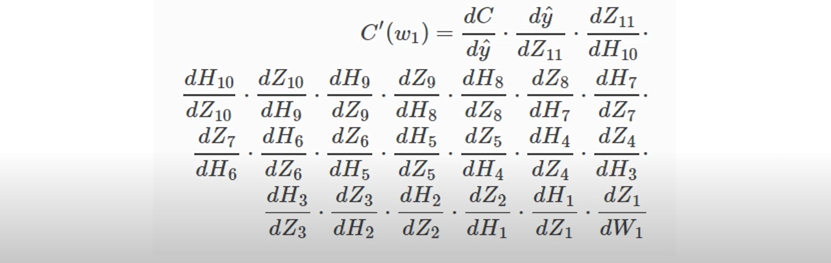

## 6.4 Ví dụ Backpropagation với đầu vào là vector[$X_0, X_1, X_2, Z_0$]

f(a) = a

h(X) = $W_0.X_0 + W_1.X_1 + W_2.X_2$

Nút $Z_1$:


h(x) = $W_0.X_0 + W_1.X_1 + W_2.X_2 $ = 1 . 1 + 1 . 0 + 1 . 0 = 1 = a
       
       z = f(a) = a   =>   z = f(1) = 1

Nút $Z_2$:


h(x) = $W_0.X_0 + W_1.X_1 + W_2.X_2 $ = 1 . 1 + 1 . 0 + 1 . 0 = 1 = a
      
       z = f(a) = a   =>   z = f(1) = 1
Nút $Z_3$:


h(x) = $W_0.X_0 + W_1.X_1 + W_2.X_2 $ = 1 . 1 + 1 . 0 + 1 . 0 = 1 = a
       
       z = f(a) = a   =>   z = f(1) = 1

Nút $D_0$:


h(x) = $W_0.Z_0 + W_1.Z_1 + W_2.Z_2 + + W_3.Z_3$ = 1 . 1 + 1 . 1 + 1 . 1 + 1 . 1 = 4 = a
       
       z = f(a) = a   =>   z = f(4) = 4
       Loss = actual_y - predicted_y = 0 - 4 = -4

**Backpropagation**

f'(a) = 1

Giả sử L'(w) = Z . delta
>Z chỉ là giá trị z mà thu được từ các phép tính hàm kích hoạt trong bước chuyển tiếp nguồn cấp dữ liệu, trong khi delta là sự mất mát của đơn vị trong lớp.

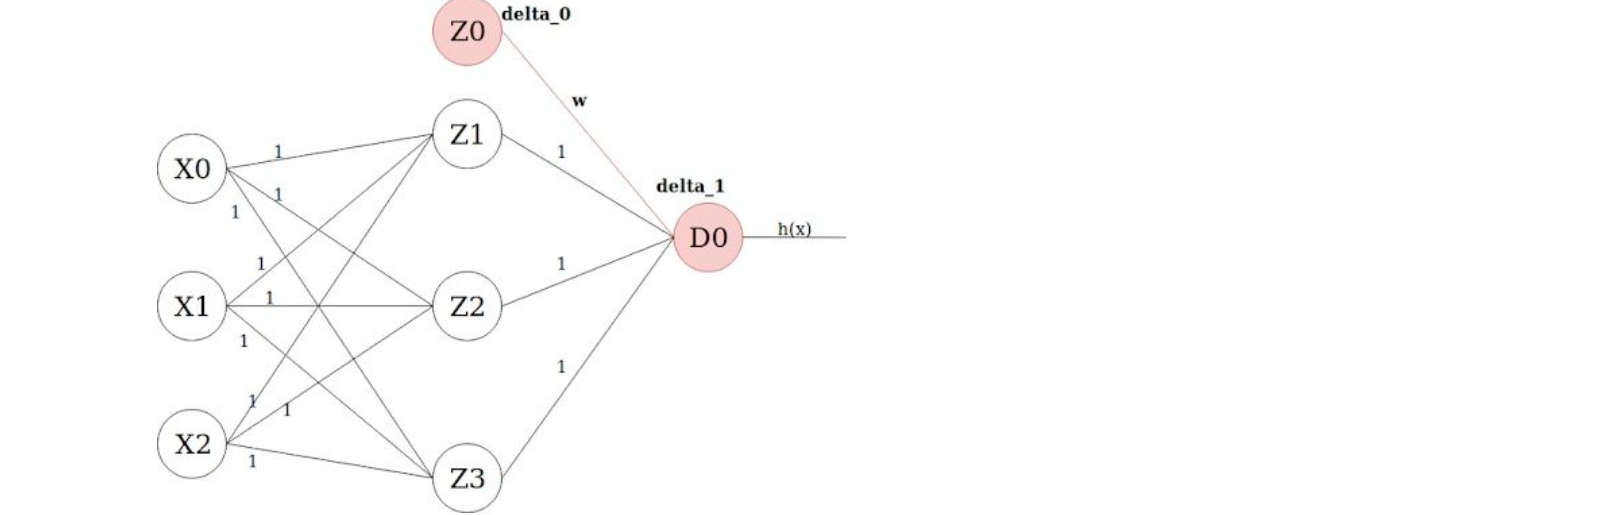

<!-- Tìm ra nút nào chịu trách nhiệm về tổn thất nhiều nhất trong mỗi lớp, để chúng ta có thể xử phạt nút đó bằng cách cho nó một giá trị trọng số nhỏ hơn và do đó làm giảm tổng tổn thất của mô hình. -->

công thức: $delta_i = w . delta_{i+1} . f'(z_i)$
> $delta_i$, w và f'(z) là các giá trị của cùng một đơn vị, trong khi $delta_{i+1}$ là sự mất mát của đơn vị ở phía bên kia của liên kết có trọng số

delta_D0 = loss = -4

delta_Z0 = W . delta_D0 . f'(Z0) = 1 . (-4) . 1 = -4

delta_Z1 = W . delta_D0 . f'(Z1) = 1 . (-4) . 1 = -4

delta_Z2 = W . delta_D0 . f'(Z2) = 1 . (-4) . 1 = -4

delta_Z3 = W . delta_D0 . f'(Z3) = 1 . (-4) . 1 = -4

W := W - learining_rate . L'(W)

{ L'(W) := Z . delta }

**Thực hiện tính W mới**

W10 := W10 - learning_rate . Z_X0 . delta_Z1
     =  1  -  0.1  .  1   .   (-4)   = 1.4

W20 := W20 - learning_rate . Z_X0 . delta_Z2
     =  1  -  0.1  .  1   .   (-4)   = 1.4

---------------------------------------------

W30 := 1.4

W11 := 1.4

W21 := 1.4

W31 := 1.4

W12 := 1.4

W22 := 1.4

W32 := 1.4

## 6.5 Ví dụ Backpropagation với đầu vào trong tập load_wine của sklearn, là ma trận với các cột là  [alcohol, malic_acid, ash] và 178 dòng 

In [ ]:
import numpy as np
import sklearn.datasets
data = sklearn.datasets.load_wine(as_frame = True).data
target = sklearn.datasets.load_wine(as_frame = True).target 
print(data.shape)
data.corr()


(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


**- Trong ví dụ này, chúng ta sẽ sử dụng một mạng neuron đơn giản với 3 lớp: lớp đầu vào, lớp ẩn và lớp đầu ra.**

**- Lớp đầu vào sẽ có 3 đơn vị, tương ứng với 3 cột của tập dữ liệu wine. Lớp ẩn sẽ có 4 đơn vị và lớp đầu ra sẽ có 1 đơn vị.**

In [ ]:
X = data[['alcohol','malic_acid','ash']].values
y = target.values

In [ ]:
# Định nghĩa 3 lớp của mạng neural 
input_size = 3 #(1)
hidden_size = 4 #(2)
output_size = 1 #(3)

In [ ]:
# Tạo trọng số cho mạng NeuralNeural
np.random.seed(0) # đảm bảo rằng mỗi lần chạy mô hình, các trọng số của mạng sẽ được khởi tạo giống nhau
W1 = np.random.rand(input_size, hidden_size) #tương ứng với 3*4 trọng số chuyển đổi từ lớp (1) đến lớp (2)
W2 = np.random.rand(hidden_size, output_size) #tương ứng với 4*1 trọng số chuyển đổi từ lớp (2) đến lớp (3)
W1_1, W2_1 = W1,W2 

In [ ]:
(W1,W2)

(array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
        [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
        [0.96366276, 0.38344152, 0.79172504, 0.52889492]]),
 array([[0.56804456],
        [0.92559664],
        [0.07103606],
        [0.0871293 ]]))

In [ ]:
# vì là bài toán hồi quy nên hàm kích hoạt được dùng là sigmoid 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return np.exp(x) / ((1 - np.exp(x))**2)
# hàm mất mát và đạo hàm của hàm mất mát 
def mse_loss(y_pred, y):
    return np.mean((y_pred - y) ** 2)
def mse_loss_dervative(y_pred, y):
    return 2*(y_pred - y)/len(y)

In [ ]:
import numpy as np
x = np.random.rand(178,)

In [ ]:
x.T.shape

(178, 1)

In [ ]:
x  = x.reshape((1,-1))

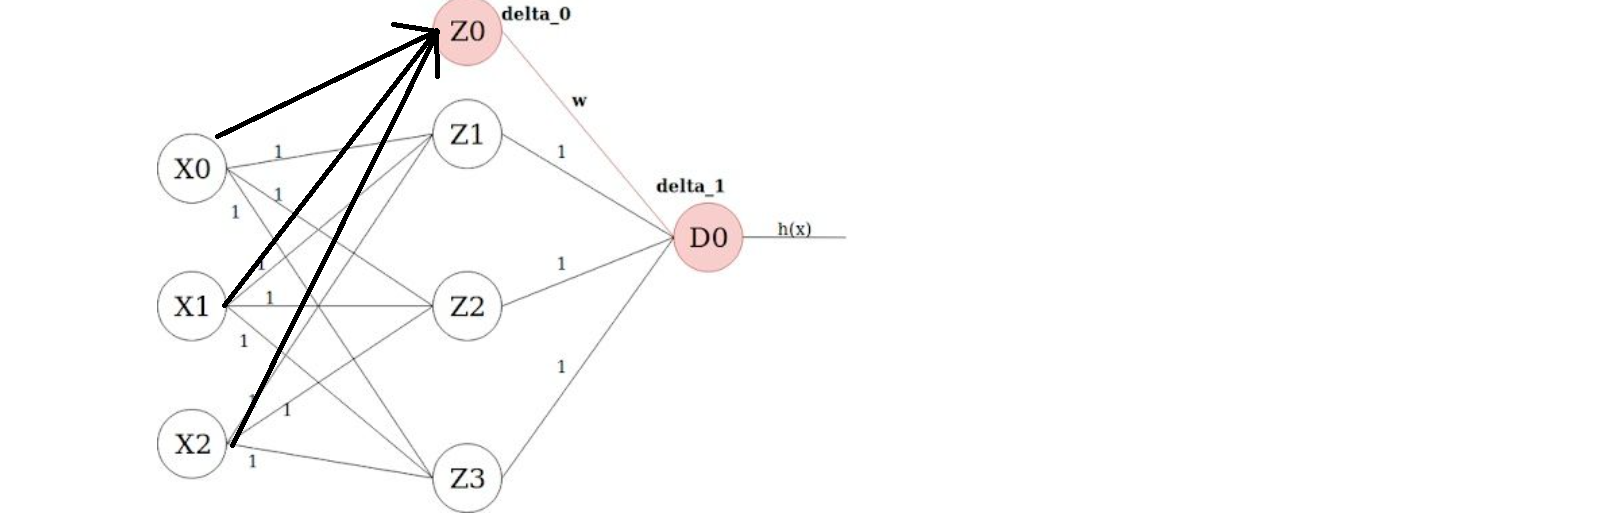

In [ ]:
np.random.seed(0) # đảm bảo rằng mỗi lần chạy mô hình, các trọng số của mạng sẽ được khởi tạo giống nhau
W1 = np.random.rand(input_size, hidden_size) #tương ứng với 3*4 trọng số chuyển đổi từ lớp (1) đến lớp (2)
W2 = np.random.rand(hidden_size, output_size)
# Tạo tham số 
learning_rate = 0.001
num_epochs = 1000

# model 
for epoch in range(num_epochs):

  # Forward 
  z1 = np.dot(X, W1)
  a1 = sigmoid(z1) # từ (1) sang (2)
  z2 = np.dot(a1, W2)
  #y_pred = sigmoid(z2) # từ (2) sang (3)
  y_pred = z2 
  # tính loss 

  loss =  mse_loss(y_pred,y)

  # Backpropagation 
  delta2 = mse_loss_dervative(y_pred.T,y).T # * sigmoid_derivative(z2)  tích của đạo hàm loss với đạo hàm sigmoid 
  dW2 = np.dot(a1.T ,delta2) 

  delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(z1) # trọng số cũ W2 nhân với delta2 nhân tiếp đạo hàm sigmoid 
  dW1 = np.dot(X.T, delta1) 

  # Update trọng số 
  W2 -= learning_rate * dW2
  W1 -= learning_rate * dW1
  
  # if (epoch / 100 <1) & (epoch%10==0):
  # print loss sau 100 lần 
  if epoch % 100 == 0:
      print("Epoch: %d, Loss: %f" % (epoch, loss))


Epoch: 0, Loss: 1.106476
Epoch: 100, Loss: 0.699456
Epoch: 200, Loss: 0.617799
Epoch: 300, Loss: 0.601416
Epoch: 400, Loss: 0.598130
Epoch: 500, Loss: 0.597470
Epoch: 600, Loss: 0.597338
Epoch: 700, Loss: 0.597311
Epoch: 800, Loss: 0.597306
Epoch: 900, Loss: 0.597305


# **7.gram_matrixt**

Calculate style

The content of an image is represented by the values of the intermediate feature maps.

It turns out, the style of an image can be described by the means and correlations across the different feature maps.**(phong cách của một hình ảnh có thể được mô tả bằng các phương tiện và mối tương quan giữa các các đặc trưng trích ra được từ tấm ảnh khác nhau.)** Calculate a Gram matrix that includes this information by taking the outer product of the feature vector with itself at each location, and averaging that outer product over all locations. This Gram matrix can be calculated for a particular layer as:

$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

This can be implemented concisely using the `tf.linalg.einsum` function:




***tf.linalg.einsum***

In [ ]:
import tensorflow as tf
con_lis = tf.convert_to_tensor([145,56,89,56])
print(con_lis)
m0 = tf.random.normal(shape=[2, 3])
m1 = tf.random.normal(shape=[3, 5])
e = tf.einsum('ij,jk->ik', m0, m1)
# output[i,k] = sum_j m0[i,j] * m1[j, k]
print(e.shape)
m0 = tf.random.normal(shape=[2, 3, 7])
m1 = tf.random.normal(shape=[3, 7, 5])
e = tf.einsum('ijk,jkl->ijkl', m0, m1)
print(e.shape)
print(e[0,1,2,1]==m0[0,1,2]*m1[1,2,1])
#0,1,2 * 1,2,1 = 0,1,2,1

tf.Tensor([145  56  89  56], shape=(4,), dtype=int32)
(2, 5)
(2, 3, 7, 5)
tf.Tensor(True, shape=(), dtype=bool)


***hàm gram_matrix***

In [ ]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor) 
  # mảng tensor 4 chiều nhân với mảng 4 chiều thành mảng 3 chiều 
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32) 
  #==IJ trong shape(input_tensor) = (?,I,J,?)
  return result/(num_locations) 

In [ ]:
# Giải thích 
import tensorflow as tf
test = tf.random.normal(shape=[2, 3, 7, 9])
result = tf.linalg.einsum('bijc,bijd->bcd', test, test)
print(result[1,2,3])
#result[1,2,3] == test[1,?,?,2] * test[1,?,?,3]
result_1_2_3 = 0
for i in range(3):
  for j in range(7):
    result_1_2_3 = result_1_2_3 + test[1,i,j,2]*test[1,i,j,3]
print(result_1_2_3)

tf.Tensor(1.8409274, shape=(), dtype=float32)
tf.Tensor(1.8409276, shape=(), dtype=float32)


#**8. Xây dựng một mô hình trả về kiểu dáng và nội dung tensors.**

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__() # gọi đến hàm tạo của cha, sử dụng được tất cả biến cũ của hàm cha  
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False
  # def __call__(self,args):
  #   self.call(args)
  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input) #trả về đầu ra bức ảnh 
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:]) # tách outputs ra làm 2 phần 

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs] # style _outputs đã qua biến đổi của hàm gram_matrix(len = 5)

    content_dict = {content_name: value 
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

In [ ]:
extractor = StyleContentModel(style_layers, content_layers) 

results = extractor(tf.constant(content_image))  # mỗi bức ảnh sẽ có 2 phần là style và content 

image = tf.Variable(content_image) # dùng tf.Variable để dễ dàng cập nhật giá trị bằng image.assign


In [1]:
import tensorflow as tf

# Tạo một hằng số
a = tf.constant([[1, 2, 3]])

# Tạo một biến và gán giá trị khởi tạo
b = tf.Variable([4, 5, 6])
c = tf.Variable([[4], [5], [6]])
# Cập nhật giá trị của biến b
b.assign([5,1,2])
print(tf.matmul(c, a))
print(a + b)
print(b)
# tf.constant nó tạo ra một tensor cố định, có nghĩa là giá trị của nó không thể thay đổi trong quá trình tính toán. 
# Đơn giản là nó đang ép kiểu bên trong thành tensor và ngược lại với tf.Variable.


tf.Tensor(
[[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]], shape=(3, 3), dtype=int32)
tf.Tensor([[6 3 5]], shape=(1, 3), dtype=int32)
<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([5, 1, 2], dtype=int32)>


In [2]:
tf.keras.applications.

<module 'keras.api._v2.keras.applications' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/applications/__init__.py'>

`tf.Variable` để chứa hình ảnh cần tối ưu hóa. Để thực hiện việc này nhanh chóng, hãy khởi tạo nó bằng hình ảnh nội dung (`tf.Variable` phải có cùng kích thước(**shape**) với ảnh content).

tf.constant: Là một giá trị không thay đổi (immutable), một hằng số (constant) được khởi tạo khi tạo đối tượng và giá trị của nó không thể thay đổi sau khi được khởi tạo.

tf.Variable: Là một biến (variable) có thể thay đổi (mutable) trong suốt quá trình huấn luyện. Khi tạo một đối tượng tf.Variable, bạn cần phải cung cấp giá trị khởi tạo ban đầu và giá trị này có thể được cập nhật theo thời gian thông qua các phép tính trong quá trình huấn luyện. Giá trị cập nhật phải cùng shape với giá trị trước

In [ ]:
style_targets = extractor(style_image)['style'] # ảnh style lấy ra style 
content_targets = extractor(content_image)['content'] # ảnh content lấy ra còn content 

#**9. Style_content_loss**

In [ ]:
style_weight=1e-2
content_weight=1e4

In [ ]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [ ]:
# Sử dụng tf.GradientTape để cập nhật hình ảnh.
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image) # loss là loss_fuction, image là trong số 
  opt.apply_gradients([(grad, image)]) # cập nhập lần 1 
  image.assign(clip_0_1(image)) # cập nhập lần 2 

  ## **-1.Thêm**

In [ ]:
# đọc ảnh từ link
import cv2
import requests
import numpy as np
from io import BytesIO
from PIL import Image

def url_to_img(url, save_as=''):
  img = Image.open(BytesIO(requests.get(url).content))
  if save_as:
    img.save(save_as)
  return np.array(img)
img1 = url_to_img('https://i.ibb.co/rGS42y1/Anh-2.jpg')
img2 = url_to_img('https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

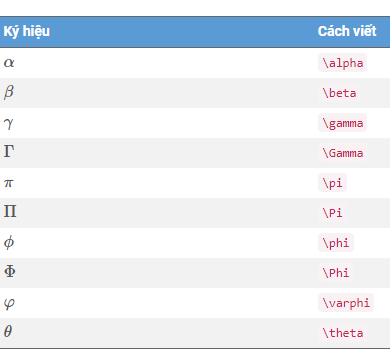

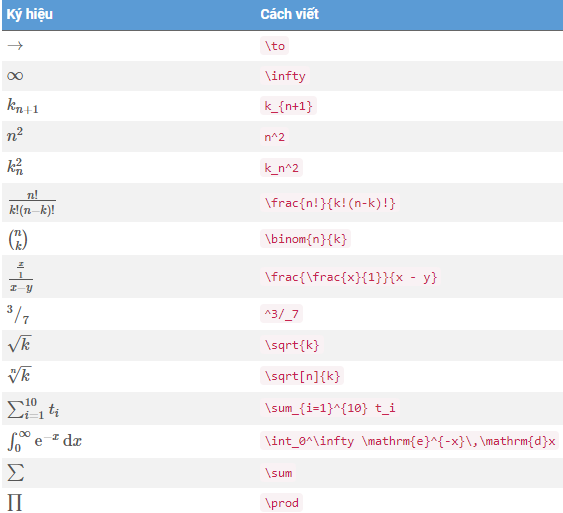

In [ ]:
a = np.random.rand(11,13,9,2)
b = np.random.rand(13,9,2,7)
print(np.dot(a, b).shape)
np.matmul(a, b).shape # phải có 2 chiều trùng nhau

In [ ]:
a = np.random.rand(7,9,9)
b = np.random.rand(7,9,2)
print(np.matmul(a, b).shape)
print(np.dot(a, b).shape)
# Phép nhân với số vô hướng không được phép.
# Các chồng ma trận được phát cùng nhau như thể các ma trận là các phần tử

(7, 9, 2)
(7, 9, 7, 2)
